In [33]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from scipy.stats import linregress

pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [34]:
happiness_finance = pd.read_csv("Resources/all_finance.csv")
region = pd.read_csv("Resources/region.csv")

In [35]:
happiness_finance.head()

,Country Name,Region,Property Rights,Freedom from Corruption,Fiscal Freedom,Government Spending,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,...,Country,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
0,Afghanistan,Asia-Pacific,nan,8.00,91.70,81.20,61.40,67.50,72.60,nan,...,Afghanistan,30.60,$35.10,3.60,10.50,"$1,150.00",8.50,7.40,69.3,nan
1,Albania,Europe,30.00,31.00,87.20,76.10,70.60,52.90,80.80,87.80,...,Albania,2.80,$26.50,0.70,2.40,"$9,506.00",16.10,1.90,"1,225.5",70.50
2,Algeria,Middle East / North Africa,30.00,36.00,80.00,38.70,66.60,50.50,71.20,60.80,...,Algeria,37.90,$285.50,2.70,2.80,"$7,534.00",9.80,3.30,"1,691",9.20
3,Angola,Sub-Saharan Africa,15.00,23.00,84.50,50.10,47.40,43.20,65.40,70.20,...,Angola,20.80,$130.10,4.10,3.80,"$6,247.00",8.40,8.80,"-4,284.8",26.60
4,Argentina,South and Central America / Caribbean,15.00,34.00,66.80,41.20,52.80,43.30,59.60,68.80,...,Argentina,41.50,$777.90,4.30,4.90,"$18,749.00",7.30,10.60,"9,082",46.90


In [36]:
region.head()

,Country,Region,Happiness Rank,Happiness Score
0,Switzerland,Western Europe,1,7.59
1,Iceland,Western Europe,2,7.56
2,Denmark,Western Europe,3,7.53
3,Norway,Western Europe,4,7.52
4,Canada,North America,5,7.43


In [37]:
all_finance = pd.merge(happiness_finance, region, on='Country', how='left')
all_finance.columns

Index(['Country Name', 'Region_x', 'Property Rights',
       'Freedom from Corruption', 'Fiscal Freedom ', 'Government Spending',
       'Business Freedom', 'Labor Freedom', 'Monetary Freedom',
       'Trade Freedom', 'Investment Freedom ', 'Financial Freedom',
       'Tariff Rate (%)', 'Income Tax Rate (%)', 'Corporate Tax Rate (%)',
       'Tax Burden % of GDP', 'Government Expenditure % of GDP ', 'Country',
       'Population (Millions)', 'GDP (Billions, PPP)', 'GDP Growth Rate (%)',
       '5 Year GDP Growth Rate (%)', 'GDP per Capita (PPP)',
       'Unemployment (%)', 'Inflation (%)', 'FDI Inflow (Millions)',
       'Public Debt (% of GDP)', 'Region_y', 'Happiness Rank',
       'Happiness Score'],
      dtype='object')

In [38]:
all_finance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373 entries, 0 to 372
Data columns (total 30 columns):
Country Name                        186 non-null object
Region_x                            186 non-null object
Property Rights                     181 non-null float64
Freedom from Corruption             185 non-null float64
Fiscal Freedom                      181 non-null float64
Government Spending                 183 non-null float64
Business Freedom                    184 non-null float64
Labor Freedom                       184 non-null float64
Monetary Freedom                    183 non-null float64
Trade Freedom                       181 non-null float64
Investment Freedom                  184 non-null float64
Financial Freedom                   181 non-null float64
Tariff Rate (%)                     181 non-null float64
Income Tax Rate (%)                 184 non-null float64
Corporate Tax Rate (%)              185 non-null float64
Tax Burden % of GDP                 181 no

In [39]:
all_finance = all_finance.dropna()
all_finance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 1 to 182
Data columns (total 30 columns):
Country Name                        140 non-null object
Region_x                            140 non-null object
Property Rights                     140 non-null float64
Freedom from Corruption             140 non-null float64
Fiscal Freedom                      140 non-null float64
Government Spending                 140 non-null float64
Business Freedom                    140 non-null float64
Labor Freedom                       140 non-null float64
Monetary Freedom                    140 non-null float64
Trade Freedom                       140 non-null float64
Investment Freedom                  140 non-null float64
Financial Freedom                   140 non-null float64
Tariff Rate (%)                     140 non-null float64
Income Tax Rate (%)                 140 non-null float64
Corporate Tax Rate (%)              140 non-null float64
Tax Burden % of GDP                 140 no

In [40]:
all_finance['GDP (Billions, PPP)'] = all_finance['GDP (Billions, PPP)'].replace('[\$,]', '', regex=True).astype(float)
all_finance['FDI Inflow (Millions)'] = all_finance['FDI Inflow (Millions)'].replace('[\$,]', '', regex=True).astype(float)
all_finance['GDP per Capita (PPP)'] = all_finance['GDP per Capita (PPP)'].replace('[\$,]', '', regex=True).astype(float)

In [41]:
all_finance.head()

,Country Name,Region_x,Property Rights,Freedom from Corruption,Fiscal Freedom,Government Spending,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,...,GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP),Region_y,Happiness Rank,Happiness Score
1,Albania,Europe,30.00,31.00,87.20,76.10,70.60,52.90,80.80,87.80,...,0.70,2.40,9506.00,16.10,1.90,1225.50,70.50,Central and Eastern Europe,95.00,4.96
2,Algeria,Middle East / North Africa,30.00,36.00,80.00,38.70,66.60,50.50,71.20,60.80,...,2.70,2.80,7534.00,9.80,3.30,1691.00,9.20,Middle East and Northern Africa,68.00,5.61
3,Angola,Sub-Saharan Africa,15.00,23.00,84.50,50.10,47.40,43.20,65.40,70.20,...,4.10,3.80,6247.00,8.40,8.80,-4284.80,26.60,Sub-Saharan Africa,137.00,4.03
4,Argentina,South and Central America / Caribbean,15.00,34.00,66.80,41.20,52.80,43.30,59.60,68.80,...,4.30,4.90,18749.00,7.30,10.60,9082.00,46.90,Latin America and Caribbean,30.00,6.57
5,Armenia,Europe,20.00,36.00,84.40,82.80,82.70,64.30,70.60,85.40,...,3.20,0.30,6191.00,16.00,5.80,370.00,41.90,Central and Eastern Europe,127.00,4.35


In [42]:
all_finance = all_finance.loc[:,['Country','Region_x',
                               'Happiness Score',
                               'GDP (Billions, PPP)',
                               'GDP per Capita (PPP)', 
                               'Unemployment (%)',
                               'Income Tax Rate (%)',
                               'Freedom from Corruption', 
                               'Fiscal Freedom ', 
                               'Government Spending',
                               'Tariff Rate (%)', 
                               'Corporate Tax Rate (%)',
                               'Tax Burden % of GDP', 
                               'Government Expenditure % of GDP ',
                               'Population (Millions)', 
                               'GDP Growth Rate (%)',
                               '5 Year GDP Growth Rate (%)', 
                               'Inflation (%)', 
                               'FDI Inflow (Millions)',
                               'Public Debt (% of GDP)',
                               'Business Freedom', 
                               'Labor Freedom', 
                               'Monetary Freedom',
                               'Trade Freedom', 
                               'Investment Freedom ', 
                               'Financial Freedom',
                               'Property Rights',]]

In [43]:
all_finance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 1 to 182
Data columns (total 27 columns):
Country                             140 non-null object
Region_x                            140 non-null object
Happiness Score                     140 non-null float64
GDP (Billions, PPP)                 140 non-null float64
GDP per Capita (PPP)                140 non-null float64
Unemployment (%)                    140 non-null float64
Income Tax Rate (%)                 140 non-null float64
Freedom from Corruption             140 non-null float64
Fiscal Freedom                      140 non-null float64
Government Spending                 140 non-null float64
Tariff Rate (%)                     140 non-null float64
Corporate Tax Rate (%)              140 non-null float64
Tax Burden % of GDP                 140 non-null float64
Government Expenditure % of GDP     140 non-null float64
Population (Millions)               140 non-null float64
GDP Growth Rate (%)                 140 no

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a210ea7b8>,
      dtype=object)

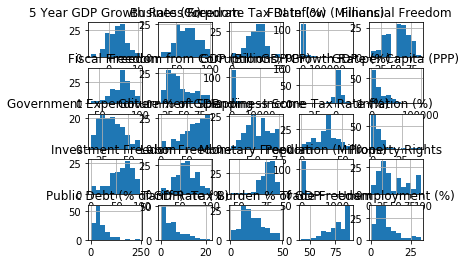

In [44]:
all_finance.hist()


In [45]:
all_finance['GDP (Billions, PPP)'] = ['{:,.2f}'.format(x) for x in all_finance['GDP (Billions, PPP)']/100]
all_finance['GDP (Billions, PPP)']= pd.to_numeric(all_finance['GDP (Billions, PPP)'],errors='coerce')
# #all_finance.info()

0.01025659456596859


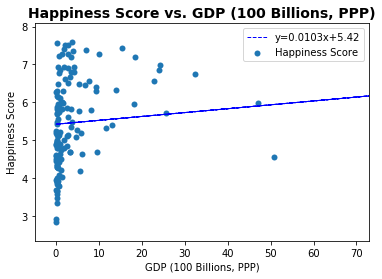

In [46]:
all_finance = all_finance.dropna()

gdp1 = all_finance["GDP (Billions, PPP)"]
x_axis = gdp1

#(slope_hle, intercept_hle, r_hle , p_hle, se_hle) = linregress(x_axis_hle,happinese_ranking_data["Happiness Score"] )
(slope_gdp1, intercept_gdp1, r_gdp1 , p_gdp1, se_gdp1) = linregress(x_axis,all_finance["Happiness Score"] )
fit_gdp1= slope_gdp1 * x_axis + intercept_gdp1

print(slope_gdp1)
#fig, (ax1, ax2) = plt.subplots(2, sharex= False)
plt.title("Happiness Score vs. GDP (100 Billions, PPP)", fontsize=14, fontweight="bold")

plt.xlim(min(all_finance["GDP (Billions, PPP)"]-5),max(all_finance["GDP (Billions, PPP)"]- 95) )
      
plt.ylim(min(all_finance["Happiness Score"]-0.5),max(all_finance["Happiness Score"])+0.5)
plt.scatter(x_axis,all_finance["Happiness Score"] ,linewidth=0, marker="o")
plt.plot(x_axis, fit_gdp1,'b--',linewidth=1,label='y={:.4f}x+{:.2f}'.format(slope_gdp1,intercept_gdp1))

plt.ylabel("Happiness Score")
plt.xlabel("GDP (100 Billions, PPP)")
plt.legend()

happiness_finance = happiness_finance.dropna()

# gdp2 = happiness_finance["Gross GDP 2015(USD Billion)"]
# x_axis2 = gdp2

# (slope_gdp2, intercept_gdp2, r_gdp2 , p_gdp2, se_gdp2) = linregress(x_axis2,happiness_finance["Happiness Score"] )
# fit_gdp2= slope_gdp2 * x_axis2 + intercept_gdp2


# print(slope_gdp2, intercept_gdp2)


# #fig, (ax1, ax2) = plt.subplots(2, sharex= False)
# plt.title("Happiness Score vs. Gross GDP", fontsize=14, fontweight="bold")

# plt.xlim(-20,1200)
      
# plt.ylim(min(happiness_finance["Happiness Score"]-0.5),max(happiness_finance["Happiness Score"])+0.5)
# plt.scatter(x_axis2,happiness_finance["Happiness Score"] ,linewidth=0, marker="o")
# plt.plot(x_axis2, fit_gdp2,'b--',linewidth=1,label='y={:.3f}x+{:.2f}'.format(slope_gdp2,intercept_gdp2))

# plt.ylabel("Happiness Score")
# plt.xlabel("Gross GDP 2015(USD Billion) ")
# plt.legend()

# #plt.scatter(happiness_finance["GDP Per Capita 2015(USD in thousands) "],happiness_finance["Happiness Score"] ,linewidth=0, marker="o")
# plt.show()

In [47]:
all_finance['GDP per Capita (PPP)'] = ['{:,.2f}'.format(x) for x in all_finance['GDP per Capita (PPP)']/1000]

In [48]:
#all_finance.head()

all_finance['GDP per Capita (PPP)']= pd.to_numeric(all_finance['GDP per Capita (PPP)'],errors='coerce')


In [49]:
all_finance.head()

,Country,Region_x,Happiness Score,"GDP (Billions, PPP)",GDP per Capita (PPP),Unemployment (%),Income Tax Rate (%),Freedom from Corruption,Fiscal Freedom,Government Spending,...,Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP),Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom,Property Rights
1,Albania,Europe,4.96,0.27,9.51,16.10,23.00,31.00,87.20,76.10,...,1.90,1225.50,70.50,70.60,52.90,80.80,87.80,70.00,70.00,30.00
2,Algeria,Middle East / North Africa,5.61,2.85,7.53,9.80,35.00,36.00,80.00,38.70,...,3.30,1691.00,9.20,66.60,50.50,71.20,60.80,25.00,30.00,30.00
3,Angola,Sub-Saharan Africa,4.03,1.30,6.25,8.40,17.00,23.00,84.50,50.10,...,8.80,-4284.80,26.60,47.40,43.20,65.40,70.20,40.00,40.00,15.00
4,Argentina,South and Central America / Caribbean,6.57,7.78,18.75,7.30,35.00,34.00,66.80,41.20,...,10.60,9082.00,46.90,52.80,43.30,59.60,68.80,30.00,30.00,15.00
5,Armenia,Europe,4.35,0.20,6.19,16.00,26.00,36.00,84.40,82.80,...,5.80,370.00,41.90,82.70,64.30,70.60,85.40,75.00,70.00,20.00


In [50]:
#all_finance['GDP (Billions, PPP)'].mean()


In [51]:
all_finance["Region_x"].unique()

array(['Europe', 'Middle East / North Africa', 'Sub-Saharan Africa',
       'South and Central America / Caribbean', 'Asia-Pacific',
       'North America'], dtype=object)

In [52]:
Europe = all_finance[all_finance["Region_x"]== 'Europe']
MENAfrica = all_finance[all_finance["Region_x"]== 'Middle East / North Africa']
SSAfrica = all_finance[all_finance["Region_x"]== 'Sub-Saharan Africa']
SCA = all_finance[all_finance["Region_x"]== 'South and Central America / Caribbean']
AsiaPacific = all_finance[all_finance["Region_x"]== 'Asia-Pacific']
NorthAmerica = all_finance[all_finance["Region_x"]== 'North America']

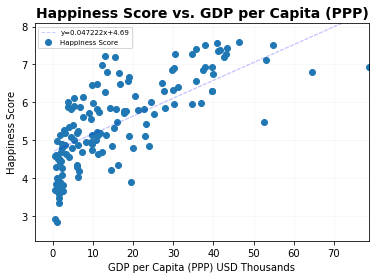

In [53]:
gdpper = all_finance["GDP per Capita (PPP)"]
x_axis = gdpper

#x_axis_Europe = Europe["GDP per Capita (PPP)"]

#(slope_hle, intercept_hle, r_hle , p_hle, se_hle) = linregress(x_axis_hle,happinese_ranking_data["Happiness Score"] )
(slope_gdpper, intercept_gdpper, r_gdpper , p_gdpper, se_gdpper) = linregress(x_axis,all_finance["Happiness Score"] )
fit_gdpper= slope_gdpper * x_axis + intercept_gdpper

#fig, (ax1, ax2) = plt.subplots(2, sharex= False)
plt.title("Happiness Score vs. GDP per Capita (PPP)", fontsize=14, fontweight="bold")

plt.xlim(min(all_finance["GDP per Capita (PPP)"]-5),max(all_finance["GDP per Capita (PPP)"])-20)
plt.ylim(min(all_finance["Happiness Score"]-0.5),max(all_finance["Happiness Score"])+0.5)
#plt.scatter(x_axis,all_finance["Happiness Score"],linewidth=1, alpha = 0.2, color = "red",edgecolor = "black", marker="o")   
plt.scatter(x_axis,all_finance["Happiness Score"],linewidth=1, marker="o")   
# plt.scatter(SSAfrica["GDP per Capita (PPP)"],SSAfrica["Happiness Score"] ,s= (25* SSAfrica["GDP (Billions, PPP)"]),linewidth=1, alpha = 0.5, color = "tomato", edgecolor = "silver", marker="o",label = "Gross GDP Sub-Saharan Africa")
# plt.scatter(MENAfrica["GDP per Capita (PPP)"],MENAfrica["Happiness Score"] ,s= (25* MENAfrica["GDP (Billions, PPP)"]),linewidth=1, alpha = 0.4, color = "gold", edgecolor = "silver", marker="o",label = "Gross GDP Middel East/N. Africa")   
# plt.scatter(SCA["GDP per Capita (PPP)"],SCA["Happiness Score"] ,s= (25* SCA["GDP (Billions, PPP)"]),linewidth=1, alpha = 0.3, color = "skyblue",edgecolor = "silver", marker="o",label = "Gross GDP South and Central America / Caribbean")  
# plt.scatter(Europe["GDP per Capita (PPP)"],Europe["Happiness Score"] ,s= (25* Europe["GDP (Billions, PPP)"]),linewidth=1, alpha = 0.2, color = "mediumseagreen", edgecolor = "silver", marker="o",label = "Gross GDP Europe")   
# plt.scatter(AsiaPacific["GDP per Capita (PPP)"],AsiaPacific["Happiness Score"] ,s= (25* AsiaPacific["GDP (Billions, PPP)"]),linewidth=1, alpha = 0.3, color = "plum",edgecolor = "silver", marker="o",label = "Gross GDP Asia-Pacific")   
# plt.scatter(NorthAmerica["GDP per Capita (PPP)"],NorthAmerica["Happiness Score"] ,s= (25* NorthAmerica["GDP (Billions, PPP)"]),linewidth=1, alpha = 0.1, color = "coral",edgecolor = "silver", marker="o",label = "Gross GDP North America")   

plt.plot(x_axis, fit_gdpper,'b--',alpha = 0.2, linewidth=1,label='y={:.6f}x+{:.2f}'.format(slope_gdpper,intercept_gdpper))

plt.ylabel("Happiness Score")
plt.xlabel("GDP per Capita (PPP) USD Thousands")
plt.legend(fontsize = '7')
plt.grid(alpha = 0.1)

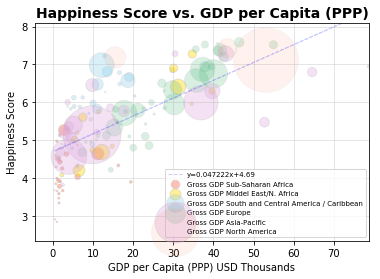

In [54]:
gdpper = all_finance["GDP per Capita (PPP)"]
x_axis = gdpper

#x_axis_Europe = Europe["GDP per Capita (PPP)"]

#(slope_hle, intercept_hle, r_hle , p_hle, se_hle) = linregress(x_axis_hle,happinese_ranking_data["Happiness Score"] )
(slope_gdpper, intercept_gdpper, r_gdpper , p_gdpper, se_gdpper) = linregress(x_axis,all_finance["Happiness Score"] )
fit_gdpper= slope_gdpper * x_axis + intercept_gdpper

#fig, (ax1, ax2) = plt.subplots(2, sharex= False)
plt.title("Happiness Score vs. GDP per Capita (PPP)", fontsize=14, fontweight="bold")

plt.xlim(min(all_finance["GDP per Capita (PPP)"]-5),max(all_finance["GDP per Capita (PPP)"])-20)
plt.ylim(min(all_finance["Happiness Score"]-0.5),max(all_finance["Happiness Score"])+0.5)
#plt.scatter(x_axis,all_finance["Happiness Score"],linewidth=1, alpha = 0.2, color = "red",edgecolor = "black", marker="o")   
#plt.scatter(x_axis,all_finance["Happiness Score"],linewidth=1, marker="o")   
plt.scatter(SSAfrica["GDP per Capita (PPP)"],SSAfrica["Happiness Score"] ,s= (25* SSAfrica["GDP (Billions, PPP)"]),linewidth=1, alpha = 0.4, color = "tomato", edgecolor = "silver", marker="o",label = "Gross GDP Sub-Saharan Africa")
plt.scatter(MENAfrica["GDP per Capita (PPP)"],MENAfrica["Happiness Score"] ,s= (25* MENAfrica["GDP (Billions, PPP)"]),linewidth=1, alpha = 0.4, color = "gold", edgecolor = "silver", marker="o",label = "Gross GDP Middel East/N. Africa")   
plt.scatter(SCA["GDP per Capita (PPP)"],SCA["Happiness Score"] ,s= (25* SCA["GDP (Billions, PPP)"]),linewidth=1, alpha = 0.3, color = "skyblue",edgecolor = "silver", marker="o",label = "Gross GDP South and Central America / Caribbean")  
plt.scatter(Europe["GDP per Capita (PPP)"],Europe["Happiness Score"] ,s= (25* Europe["GDP (Billions, PPP)"]),linewidth=1, alpha = 0.2, color = "mediumseagreen", edgecolor = "silver", marker="o",label = "Gross GDP Europe")   
plt.scatter(AsiaPacific["GDP per Capita (PPP)"],AsiaPacific["Happiness Score"] ,s= (25* AsiaPacific["GDP (Billions, PPP)"]),linewidth=1, alpha = 0.3, color = "plum",edgecolor = "silver", marker="o",label = "Gross GDP Asia-Pacific")   
plt.scatter(NorthAmerica["GDP per Capita (PPP)"],NorthAmerica["Happiness Score"] ,s= (25* NorthAmerica["GDP (Billions, PPP)"]),linewidth=1, alpha = 0.1, color = "coral",edgecolor = "silver", marker="o",label = "Gross GDP North America")   

plt.plot(x_axis, fit_gdpper,'b--',alpha = 0.2, linewidth=1,label='y={:.6f}x+{:.2f}'.format(slope_gdpper,intercept_gdpper))

plt.ylabel("Happiness Score")
plt.xlabel("GDP per Capita (PPP) USD Thousands")
plt.legend(fontsize = '7')
plt.grid(alpha = 0.4)

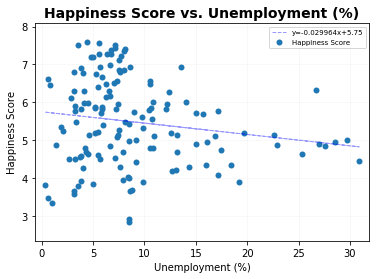

In [55]:
unemployment = all_finance["Unemployment (%)"]
x_axis = unemployment

#(slope_hle, intercept_hle, r_hle , p_hle, se_hle) = linregress(x_axis_hle,happinese_ranking_data["Happiness Score"] )
(slope_unemployment, intercept_unemployment, r_unemployment , p_unemployment, se_unemployment) = linregress(x_axis,all_finance["Happiness Score"] )
fit_unemployment = slope_unemployment * x_axis + intercept_unemployment

#fig, (ax1, ax2) = plt.subplots(2, sharex= False)
plt.title("Happiness Score vs. Unemployment (%)", fontsize=14, fontweight="bold")

plt.xlim(min(all_finance["Unemployment (%)"])-1,max(all_finance["Unemployment (%)"])+1)
plt.ylim(min(all_finance["Happiness Score"]-0.5),max(all_finance["Happiness Score"])+0.5)
plt.scatter(x_axis,all_finance["Happiness Score"] ,linewidth=0, marker="o")
# plt.scatter(SSAfrica["Unemployment (%)"],SSAfrica["Happiness Score"] ,linewidth=1, alpha = 0.5, color = "tomato", edgecolor = "silver", marker="o",label = "Gross GDP Sub-Saharan Africa")
# plt.scatter(MENAfrica["Unemployment (%)"],MENAfrica["Happiness Score"] ,linewidth=1, alpha = 0.4, color = "gold", edgecolor = "silver", marker="o",label = "Gross GDP Middel East/N. Africa")   
# plt.scatter(SCA["Unemployment (%)"],SCA["Happiness Score"] ,linewidth=1, alpha = 0.3, color = "skyblue",edgecolor = "silver", marker="o",label = "Gross GDP South and Central America / Caribbean")  
# plt.scatter(Europe["Unemployment (%)"],Europe["Happiness Score"], alpha = 0.2, color = "mediumseagreen", edgecolor = "silver", marker="o",label = "Gross GDP Europe")   
# plt.scatter(AsiaPacific["Unemployment (%)"],AsiaPacific["Happiness Score"] ,linewidth=1, alpha = 0.3, color = "plum",edgecolor = "silver", marker="o",label = "Gross GDP Asia-Pacific")   
# plt.scatter(NorthAmerica["Unemployment (%)"],NorthAmerica["Happiness Score"] ,linewidth=1, alpha = 0.1, color = "coral",edgecolor = "silver", marker="o",label = "Gross GDP North America")   

plt.plot(x_axis, fit_unemployment ,'b--',alpha = 0.4,linewidth=1,label='y={:.6f}x+{:.2f}'.format(slope_unemployment,intercept_unemployment))

plt.ylabel("Happiness Score")
plt.xlabel("Unemployment (%)")
plt.legend(fontsize = '7')
plt.grid(alpha = 0.1)
#pyplot.legend(loc=2, fontsize = 'x-small')

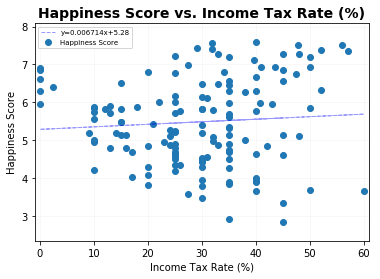

In [56]:
#Income Tax Rate (%)
incometax = all_finance["Income Tax Rate (%)"]
x_axis = incometax

#(slope_hle, intercept_hle, r_hle , p_hle, se_hle) = linregress(x_axis_hle,happinese_ranking_data["Happiness Score"] )
(slope_incometax, intercept_incometax, r_incometax, p_incometax, se_incometax) = linregress(x_axis,all_finance["Happiness Score"] )
fit_incometax = slope_incometax * x_axis + intercept_incometax

#fig, (ax1, ax2) = plt.subplots(2, sharex= False)
plt.title("Happiness Score vs. Income Tax Rate (%)", fontsize=14, fontweight="bold")

plt.xlim(min(all_finance["Income Tax Rate (%)"])-1,max(all_finance["Income Tax Rate (%)"])+1)
plt.ylim(min(all_finance["Happiness Score"]-0.5),max(all_finance["Happiness Score"])+0.5)
plt.scatter(x_axis,all_finance["Happiness Score"] ,linewidth=1, marker="o")
# plt.scatter(SSAfrica["Income Tax Rate (%)"],SSAfrica["Happiness Score"],linewidth=1, alpha = 0.7, color = "orange", edgecolor = "silver", marker="o",label = "Happiness Score in Sub-Saharan Africa")
# plt.scatter(MENAfrica["Income Tax Rate (%)"],MENAfrica["Happiness Score"],linewidth=1, alpha = 0.7, color = "gold", edgecolor = "silver", marker="o",label = "Happiness Score in Middel East/N. Africa")   
# plt.scatter(SCA["Income Tax Rate (%)"],SCA["Happiness Score"] ,linewidth=1, alpha = 0.7, color = "skyblue",edgecolor = "silver", marker="o",label = "Happiness Score in South and Central America / Caribbean")  
# plt.scatter(Europe["Income Tax Rate (%)"],Europe["Happiness Score"] ,linewidth=1, alpha = 0.7, color = "mediumseagreen", edgecolor = "silver", marker="o",label = "Happiness Score in Europe")   
# plt.scatter(AsiaPacific["Income Tax Rate (%)"],AsiaPacific["Happiness Score"],linewidth=1, alpha = 0.7, color = "plum",edgecolor = "silver", marker="o",label = "Happiness Score in Asia-Pacific")   
# plt.scatter(NorthAmerica["Income Tax Rate (%)"],NorthAmerica["Happiness Score"],linewidth=1, alpha = 0.7, color = "coral",edgecolor = "silver", marker="o",label = "Happiness Score in North America")   


plt.plot(x_axis, fit_incometax ,'b--',alpha = 0.4,linewidth=1,label='y={:.6f}x+{:.2f}'.format(slope_incometax,intercept_incometax))

plt.ylabel("Happiness Score")
plt.xlabel("Income Tax Rate (%)")
plt.legend(fontsize = '7')
plt.grid(alpha = 0.1)

In [57]:
Europe = all_finance[all_finance["Region_x"]== 'Europe']
MENAfrica = all_finance[all_finance["Region_x"]== 'Middle East / North Africa']
SSAfrica = all_finance[all_finance["Region_x"]== 'Sub-Saharan Africa']
SCA = all_finance[all_finance["Region_x"]== 'South and Central America / Caribbean']
AsiaPacific = all_finance[all_finance["Region_x"]== 'Asia-Pacific']
NorthAmerica = all_finance[all_finance["Region_x"]== 'North America']

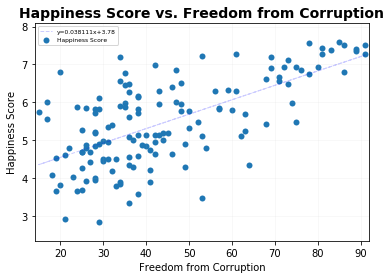

In [58]:
# Freedom from Corruption
corruption = all_finance["Freedom from Corruption"]
x_axis = corruption

#(slope_hle, intercept_hle, r_hle , p_hle, se_hle) = linregress(x_axis_hle,happinese_ranking_data["Happiness Score"] )
(slope_corruption, intercept_corruption, r_corruption, p_corruption, se_corruption) = linregress(x_axis,all_finance["Happiness Score"] )
fit_corruption = slope_corruption * x_axis + intercept_corruption

#fig, (ax1, ax2) = plt.subplots(2, sharex= False)
plt.title("Happiness Score vs. Freedom from Corruption", fontsize=14, fontweight="bold")

plt.xlim(min(all_finance["Freedom from Corruption"])-1,max(all_finance["Freedom from Corruption"])+1)
plt.ylim(min(all_finance["Happiness Score"]-0.5),max(all_finance["Happiness Score"])+0.5)
plt.scatter(x_axis,all_finance["Happiness Score"] ,linewidth=0, marker="o")
# plt.scatter(SSAfrica["Freedom from Corruption"],SSAfrica["Happiness Score"],linewidth=1, alpha = 0.7, color = "orange", edgecolor = "silver", marker="o",label = "Happiness Score in Sub-Saharan Africa")
# plt.scatter(MENAfrica["Freedom from Corruption"],MENAfrica["Happiness Score"],linewidth=1, alpha = 0.7, color = "gold", edgecolor = "silver", marker="o",label = "Happiness Score in Middel East/N. Africa")   
# plt.scatter(SCA["Freedom from Corruption"],SCA["Happiness Score"] ,linewidth=1, alpha = 0.7, color = "skyblue",edgecolor = "silver", marker="o",label = "Happiness Score in South and Central America / Caribbean")  
# plt.scatter(Europe["Freedom from Corruption"],Europe["Happiness Score"] ,linewidth=1, alpha = 0.7, color = "mediumseagreen", edgecolor = "silver", marker="o",label = "Happiness Score in Europe")   
# plt.scatter(AsiaPacific["Freedom from Corruption"],AsiaPacific["Happiness Score"],linewidth=1, alpha = 0.7, color = "plum",edgecolor = "silver", marker="o",label = "Happiness Score in Asia-Pacific")   
# plt.scatter(NorthAmerica["Freedom from Corruption"],NorthAmerica["Happiness Score"],linewidth=1, alpha = 0.7, color = "coral",edgecolor = "silver", marker="o",label = "Happiness Score in North America")   


plt.plot(x_axis, fit_corruption ,'b--',linewidth=1,alpha = 0.2, label='y={:.6f}x+{:.2f}'.format(slope_corruption,intercept_corruption))

plt.ylabel("Happiness Score")
plt.xlabel("Freedom from Corruption")
plt.legend(fontsize = '6')
plt.grid(alpha = 0.1)

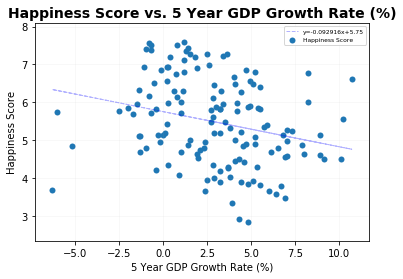

In [59]:
gdp5year = all_finance["5 Year GDP Growth Rate (%)"]
x_axis = gdp5year

#(slope_hle, intercept_hle, r_hle , p_hle, se_hle) = linregress(x_axis_hle,happinese_ranking_data["Happiness Score"] )
(slope_gdp5year, intercept_gdp5year, r_gdp5year, p_gdp5year, se_gdp5year) = linregress(x_axis,all_finance["Happiness Score"] )
fit_gdp5year = slope_gdp5year * x_axis + intercept_gdp5year

#fig, (ax1, ax2) = plt.subplots(2, sharex= False)
plt.title("Happiness Score vs. 5 Year GDP Growth Rate (%)", fontsize=14, fontweight="bold")

plt.xlim(min(all_finance["5 Year GDP Growth Rate (%)"])-1,max(all_finance["5 Year GDP Growth Rate (%)"])+1)
plt.ylim(min(all_finance["Happiness Score"]-0.5),max(all_finance["Happiness Score"])+0.5)
plt.scatter(x_axis,all_finance["Happiness Score"] ,linewidth=0, marker="o")
# plt.scatter(SSAfrica["5 Year GDP Growth Rate (%)"],SSAfrica["Happiness Score"],linewidth=1, alpha = 0.7, color = "orange", edgecolor = "silver", marker="o",label = "Happiness Score in Sub-Saharan Africa")
# plt.scatter(MENAfrica["5 Year GDP Growth Rate (%)"],MENAfrica["Happiness Score"],linewidth=1, alpha = 0.7, color = "gold", edgecolor = "silver", marker="o",label = "Happiness Score in Middel East/N. Africa")   
# plt.scatter(SCA["5 Year GDP Growth Rate (%)"],SCA["Happiness Score"] ,linewidth=1, alpha = 0.7, color = "skyblue",edgecolor = "silver", marker="o",label = "Happiness Score in South and Central America / Caribbean")  
# plt.scatter(Europe["5 Year GDP Growth Rate (%)"],Europe["Happiness Score"] ,linewidth=1, alpha = 0.7, color = "mediumseagreen", edgecolor = "silver", marker="o",label = "Happiness Score in Europe")   
# plt.scatter(AsiaPacific["5 Year GDP Growth Rate (%)"],AsiaPacific["Happiness Score"],linewidth=1, alpha = 0.7, color = "plum",edgecolor = "silver", marker="o",label = "Happiness Score in Asia-Pacific")   
# plt.scatter(NorthAmerica["5 Year GDP Growth Rate (%)"],NorthAmerica["Happiness Score"],linewidth=1, alpha = 0.7, color = "coral",edgecolor = "silver", marker="o",label = "Happiness Score in North America")   


plt.plot(x_axis, fit_gdp5year ,'b--',alpha = 0.3, linewidth=1,label='y={:.6f}x+{:.2f}'.format(slope_gdp5year,intercept_gdp5year))

plt.ylabel("Happiness Score")
plt.xlabel("5 Year GDP Growth Rate (%)")
plt.legend(fontsize = '6')
plt.grid(alpha = 0.1)

In [60]:
print(r_gdp5year, p_gdp5year, se_gdp5year)

-0.25734342415349715 0.002144185931671006 0.029700040228672543


In [61]:
# #Government Spending
# govspend = all_finance["Government Spending"]
# x_axis = govspend

# #(slope_hle, intercept_hle, r_hle , p_hle, se_hle) = linregress(x_axis_hle,happinese_ranking_data["Happiness Score"] )
# (slope_govspend, intercept_govspend, r_govspend, p_govspend, se_govspend) = linregress(x_axis,all_finance["Happiness Score"] )
# fit_govspend = slope_govspend * x_axis + intercept_govspend

# #fig, (ax1, ax2) = plt.subplots(2, sharex= False)
# plt.title("Happiness Score vs. Government Spending", fontsize=14, fontweight="bold")

# plt.xlim(min(all_finance["Government Spending"])-1,max(all_finance["Government Spending"])+1)
# plt.ylim(min(all_finance["Happiness Score"]-0.5),max(all_finance["Happiness Score"])+0.5)
# #plt.scatter(x_axis,all_finance["Happiness Score"] ,linewidth=0, marker="o")
# plt.scatter(SSAfrica["Government Spending"],SSAfrica["Happiness Score"],linewidth=1, alpha = 0.7, color = "orange", edgecolor = "silver", marker="o",label = "Happiness Score in Sub-Saharan Africa")
# plt.scatter(MENAfrica["Government Spending"],MENAfrica["Happiness Score"],linewidth=1, alpha = 0.7, color = "gold", edgecolor = "silver", marker="o",label = "Happiness Score in Middel East/N. Africa")   
# plt.scatter(SCA["Government Spending"],SCA["Happiness Score"] ,linewidth=1, alpha = 0.7, color = "skyblue",edgecolor = "silver", marker="o",label = "Happiness Score in South and Central America / Caribbean")  
# plt.scatter(Europe["Government Spending"],Europe["Happiness Score"] ,linewidth=1, alpha = 0.7, color = "mediumseagreen", edgecolor = "silver", marker="o",label = "Happiness Score in Europe")   
# plt.scatter(AsiaPacific["Government Spending"],AsiaPacific["Happiness Score"],linewidth=1, alpha = 0.7, color = "plum",edgecolor = "silver", marker="o",label = "Happiness Score in Asia-Pacific")   
# plt.scatter(NorthAmerica["Government Spending"],NorthAmerica["Happiness Score"],linewidth=1, alpha = 0.7, color = "coral",edgecolor = "silver", marker="o",label = "Happiness Score in North America")   
# plt.plot(x_axis, fit_govspend ,'b--',linewidth=1,alpha = 0.3, label='y={:.6f}x+{:.2f}'.format(slope_govspend,intercept_govspend))

# plt.ylabel("Happiness Score")
# plt.xlabel("Government Spending")
# plt.legend(fontsize = '6')
# plt.grid(alpha = 0.1)

In [62]:
print(r_govspend, p_govspend, se_govspend)

NameError: name 'r_govspend' is not defined

In [ ]:
#Inflation (%)

inflation = all_finance["Inflation (%)"]
x_axis = inflation

#(slope_hle, intercept_hle, r_hle , p_hle, se_hle) = linregress(x_axis_hle,happinese_ranking_data["Happiness Score"] )
(slope_inflation, intercept_inflation, r_inflation, p_inflation, se_inflation) = linregress(x_axis,all_finance["Happiness Score"] )
fit_inflation = slope_inflation * x_axis + intercept_inflation

#fig, (ax1, ax2) = plt.subplots(2, sharex= False)
plt.title("Happiness Score vs. Inflation (%)", fontsize=14, fontweight="bold")

plt.xlim(min(all_finance["Inflation (%)"])-4,max(all_finance["Inflation (%)"]))
plt.ylim(min(all_finance["Happiness Score"]-0.5),max(all_finance["Happiness Score"])+0.5)
plt.scatter(x_axis,all_finance["Happiness Score"] ,linewidth=0, marker="o")
# plt.scatter(SSAfrica["Inflation (%)"],SSAfrica["Happiness Score"],linewidth=1, alpha = 0.7, color = "orange", edgecolor = "silver", marker="o",label = "Happiness Score in Sub-Saharan Africa")
# plt.scatter(MENAfrica["Inflation (%)"],MENAfrica["Happiness Score"],linewidth=1, alpha = 0.7, color = "gold", edgecolor = "silver", marker="o",label = "Happiness Score in Middel East/N. Africa")   
# plt.scatter(SCA["Inflation (%)"],SCA["Happiness Score"] ,linewidth=1, alpha = 0.7, color = "skyblue",edgecolor = "silver", marker="o",label = "Happiness Score in South and Central America / Caribbean")  
# plt.scatter(Europe["Inflation (%)"],Europe["Happiness Score"] ,linewidth=1, alpha = 0.7, color = "mediumseagreen", edgecolor = "silver", marker="o",label = "Happiness Score in Europe")   
# plt.scatter(AsiaPacific["Inflation (%)"],AsiaPacific["Happiness Score"],linewidth=1, alpha = 0.7, color = "plum",edgecolor = "silver", marker="o",label = "Happiness Score in Asia-Pacific")   
# plt.scatter(NorthAmerica["Inflation (%)"],NorthAmerica["Happiness Score"],linewidth=1, alpha = 0.7, color = "coral",edgecolor = "silver", marker="o",label = "Happiness Score in North America")   

plt.plot(x_axis, fit_inflation,'b--',alpha = 0.4,linewidth=1,label='y={:.6f}x+{:.2f}'.format(slope_inflation,intercept_inflation))

plt.ylabel("Happiness Score")
plt.xlabel("Inflation (%)")
plt.legend(fontsize = '6')
plt.grid(alpha = 0.2)

In [ ]:
print(r_inflation, p_inflation, se_inflation)

In [ ]:
#Labor Freedom
fdi = all_finance["FDI Inflow (Millions)"]
x_axis = fdi

#(slope_hle, intercept_hle, r_hle , p_hle, se_hle) = linregress(x_axis_hle,happinese_ranking_data["Happiness Score"] )
(slope_fdi, intercept_fdi, r_fdi, p_fdi, se_fdi) = linregress(x_axis,all_finance["Happiness Score"] )
fit_fdi = slope_fdi * x_axis + intercept_fdi

#fig, (ax1, ax2) = plt.subplots(2, sharex= False)
plt.title("Happiness Score vs. FDI Inflow (Millions)", fontsize=14, fontweight="bold")

plt.xlim(min(all_finance["FDI Inflow (Millions)"])-100,max(all_finance["Government Spending"])+100)
plt.ylim(min(all_finance["Happiness Score"]-0.5),max(all_finance["Happiness Score"])+0.5)
plt.scatter(x_axis,all_finance["Happiness Score"] ,linewidth=0, marker="o")
plt.plot(x_axis, fit_fdi,'b--',linewidth=1,label='y={:.6f}x+{:.2f}'.format(slope_fdi,intercept_fdi))

plt.ylabel("Happiness Score")
plt.xlabel("FDI Inflow (Millions)")
plt.legend()

In [ ]:
debt = all_finance["Public Debt (% of GDP)"]
x_axis = debt

#(slope_hle, intercept_hle, r_hle , p_hle, se_hle) = linregress(x_axis_hle,happinese_ranking_data["Happiness Score"] )
(slope_debt, intercept_debt, r_debt, p_debt, se_debt) = linregress(x_axis,all_finance["Happiness Score"] )
fit_debt = slope_debt * x_axis + intercept_debt

#fig, (ax1, ax2) = plt.subplots(2, sharex= False)
plt.title("Happiness Score vs. Public Debt (% of GDP)", fontsize=14, fontweight="bold")

plt.xlim(min(all_finance["Public Debt (% of GDP)"])-10,max(all_finance["Public Debt (% of GDP)"])+10)
plt.ylim(min(all_finance["Happiness Score"]-0.5),max(all_finance["Happiness Score"])+0.5)
plt.scatter(x_axis,all_finance["Happiness Score"] ,linewidth=0, marker="o")
# plt.scatter(SSAfrica["Public Debt (% of GDP)"],SSAfrica["Happiness Score"],linewidth=1, alpha = 0.7, color = "orange", edgecolor = "silver", marker="o",label = "Happiness Score in Sub-Saharan Africa")
# plt.scatter(MENAfrica["Public Debt (% of GDP)"],MENAfrica["Happiness Score"],linewidth=1, alpha = 0.7, color = "gold", edgecolor = "silver", marker="o",label = "Happiness Score in Middel East/N. Africa")   
# plt.scatter(SCA["Public Debt (% of GDP)"],SCA["Happiness Score"] ,linewidth=1, alpha = 0.7, color = "skyblue",edgecolor = "silver", marker="o",label = "Happiness Score in South and Central America / Caribbean")  
# plt.scatter(Europe["Public Debt (% of GDP)"],Europe["Happiness Score"] ,linewidth=1, alpha = 0.7, color = "mediumseagreen", edgecolor = "silver", marker="o",label = "Happiness Score in Europe")   
# plt.scatter(AsiaPacific["Public Debt (% of GDP)"],AsiaPacific["Happiness Score"],linewidth=1, alpha = 0.7, color = "plum",edgecolor = "silver", marker="o",label = "Happiness Score in Asia-Pacific")   
# plt.scatter(NorthAmerica["Public Debt (% of GDP)"],NorthAmerica["Happiness Score"],linewidth=1, alpha = 0.7, color = "coral",edgecolor = "silver", marker="o",label = "Happiness Score in North America")   


plt.plot(x_axis, fit_debt,'b--',alpha = 0.4, linewidth=1,label='y={:.6f}x+{:.2f}'.format(slope_debt,intercept_debt))

plt.ylabel("Happiness Score")
plt.xlabel("Public Debt (% of GDP)")
plt.legend(fontsize = '6')
plt.grid(alpha = 0.1)

In [ ]:
#Labor Freedom
labor = all_finance["Labor Freedom"]
x_axis = labor

#(slope_hle, intercept_hle, r_hle , p_hle, se_hle) = linregress(x_axis_hle,happinese_ranking_data["Happiness Score"] )
(slope_labor, intercept_labor, r_labor, p_labor, se_labor) = linregress(x_axis,all_finance["Happiness Score"] )
fit_labor = slope_labor * x_axis + intercept_labor

#fig, (ax1, ax2) = plt.subplots(2, sharex= False)
plt.title("Happiness Score vs. Labor Freedom", fontsize=14, fontweight="bold")

plt.xlim(min(all_finance["Labor Freedom"])-10,max(all_finance["Government Spending"])+10)
plt.ylim(min(all_finance["Happiness Score"]-0.5),max(all_finance["Happiness Score"])+0.5)
plt.scatter(x_axis,all_finance["Happiness Score"] ,linewidth=0, marker="o")
# plt.scatter(SSAfrica["Labor Freedom"],SSAfrica["Happiness Score"],linewidth=1, alpha = 0.7, color = "orange", edgecolor = "silver", marker="o",label = "Happiness Score in Sub-Saharan Africa")
# plt.scatter(MENAfrica["Labor Freedom"],MENAfrica["Happiness Score"],linewidth=1, alpha = 0.7, color = "gold", edgecolor = "silver", marker="o",label = "Happiness Score in Middel East/N. Africa")   
# plt.scatter(SCA["Labor Freedom"],SCA["Happiness Score"] ,linewidth=1, alpha = 0.7, color = "skyblue",edgecolor = "silver", marker="o",label = "Happiness Score in South and Central America / Caribbean")  
# plt.scatter(Europe["Labor Freedom"],Europe["Happiness Score"] ,linewidth=1, alpha = 0.7, color = "mediumseagreen", edgecolor = "silver", marker="o",label = "Happiness Score in Europe")   
# plt.scatter(AsiaPacific["Labor Freedom"],AsiaPacific["Happiness Score"],linewidth=1, alpha = 0.7, color = "plum",edgecolor = "silver", marker="o",label = "Happiness Score in Asia-Pacific")   
# plt.scatter(NorthAmerica["Labor Freedom"],NorthAmerica["Happiness Score"],linewidth=1, alpha = 0.7, color = "coral",edgecolor = "silver", marker="o",label = "Happiness Score in North America")   


plt.plot(x_axis, fit_labor,'b--',alpha = 0.4, linewidth=1,label='y={:.6f}x+{:.2f}'.format(slope_labor,intercept_labor))

plt.ylabel("Happiness Score")
plt.xlabel("Labor Freedom")
plt.legend(fontsize = '6')
plt.grid(alpha = 0.1)

In [ ]:
#Property Rights
propertyr = all_finance["Property Rights"]
x_axis = propertyr

#(slope_hle, intercept_hle, r_hle , p_hle, se_hle) = linregress(x_axis_hle,happinese_ranking_data["Happiness Score"] )
(slope_propertyr, intercept_propertyr, r_propertyr, p_propertyr, se_propertyr) = linregress(x_axis,all_finance["Happiness Score"] )
fit_propertyr = slope_propertyr * x_axis + intercept_propertyr

#fig, (ax1, ax2) = plt.subplots(2, sharex= False)
plt.title("Happiness Score vs. Property Rights", fontsize=14, fontweight="bold")

plt.xlim(min(all_finance["Property Rights"])-10,max(all_finance["Government Spending"])+10)
plt.ylim(min(all_finance["Happiness Score"]-0.5),max(all_finance["Happiness Score"])+0.5)
plt.scatter(x_axis,all_finance["Happiness Score"] ,linewidth=0, marker="o")
# plt.scatter(SSAfrica["Property Rights"],SSAfrica["Happiness Score"],linewidth=1, alpha = 0.7, color = "orange", edgecolor = "silver", marker="o",label = "Happiness Score in Sub-Saharan Africa")
# # plt.scatter(MENAfrica["Property Rights"],MENAfrica["Happiness Score"],linewidth=1, alpha = 0.7, color = "gold", edgecolor = "silver", marker="o",label = "Happiness Score in Middel East/N. Africa")   
# plt.scatter(SCA["Property Rights"],SCA["Happiness Score"] ,linewidth=1, alpha = 0.7, color = "skyblue",edgecolor = "silver", marker="o",label = "Happiness Score in South and Central America / Caribbean")  
# plt.scatter(Europe["Property Rights"],Europe["Happiness Score"] ,linewidth=1, alpha = 0.7, color = "mediumseagreen", edgecolor = "silver", marker="o",label = "Happiness Score in Europe")   
# plt.scatter(AsiaPacific["Property Rights"],AsiaPacific["Happiness Score"],linewidth=1, alpha = 0.7, color = "plum",edgecolor = "silver", marker="o",label = "Happiness Score in Asia-Pacific")   
# plt.scatter(NorthAmerica["Property Rights"],NorthAmerica["Happiness Score"],linewidth=1, alpha = 0.7, color = "coral",edgecolor = "silver", marker="o",label = "Happiness Score in North America")   
plt.plot(x_axis, fit_propertyr,'b--',alpha = 0.2,linewidth=1,label='y={:.6f}x+{:.2f}'.format(slope_propertyr,intercept_propertyr))

plt.ylabel("Happiness Score")
plt.xlabel("Property Rights")
plt.legend(fontsize = '6')
plt.grid(alpha = 0.1)

In [ ]:
all_finance.head()

In [ ]:
stats_df=pd.DataFrame({"Factors":['GDP (Billions, PPP)',
                                  'GDP per Capita (PPP)', 
                                  'Unemployment (%)',
                                  'Income Tax Rate (%)',
                                  'Freedom from Corruption',
                                  'Government Spending',
                                  'Inflation (%)',
                                  'Labor Freedom',
                                  'Property Rights'],
                                  
                      "R Value":[r_gdp1,r_gdpper, r_unemployment, r_incometax,r_corruption, r_govspend, r_inflation, r_labor, r_propertyr],
                      "P Value":[p_gdp1,p_gdpper, p_unemployment, p_incometax,p_corruption, p_govspend, p_inflation, p_labor, p_propertyr],
                      "Standard Error":[se_gdp1,se_gdpper,se_unemployment,se_incometax,se_corruption, se_govspend, se_inflation, se_labor, se_propertyr]})
stats_df

In [ ]:
stats_df.to_csv('finance_stat.csv')

In [ ]:
df = all_finance.corr()
df.head()

In [ ]:
#all_finance.info()

In [ ]:
#all_finance['Country']

In [ ]:
# test = pd.DataFrame(all_finance, columns=['Freedom from Corruption','Business Freedom','Labor Freedom', 'Financial Freedom','Investment Freedom','Monetary Freedom'])
# test.plot.barh(figsize=(18,25),stacked=True)
# plt.xticks(rotation="vertical")
# all_finance.sort_values(ascending=False)[['Freedom from Corruption','Business Freedom','Labor Freedom', 'Financial Freedom','Investment Freedom','Monetary Freedom']].plot.bar(stacked=True, rot=0)
# plt.legend(fontsize = '12')

all_free_index = all_finance[['Country','Freedom from Corruption','Business Freedom','Labor Freedom', 'Financial Freedom','Investment Freedom ','Monetary Freedom']].copy()
all_free_index['total'] = all_free_index.sum(axis = 1)
all_free_index['new']=all_finance['Happiness Score']
#all_free_index['new'] 
all_free_index = all_free_index.sort_values('total', ascending = True).set_index('Country')
colors = ["mistyrose","cornsilk","lightcyan","lavender",'thistle',"peachpuff"]
del all_free_index['total']

all_free_index.plot.barh(figsize=(18,25),color = colors, stacked=True)

plt.xticks(rotation="vertical")
plt.legend(fontsize = '12')

plt.title("Economic Freedom Index Total", fontsize=14, fontweight="bold")
plt.xlabel("Economic Freedom Index Total")
plt.show()
all_free_index['total'] = all_free_index.sum(axis = 1)
#all_free_index['new']=all_finance['Happiness Score']
# all_free_index['total']=all_free_index.sum(axis = 1)
# all_finance['Happiness Score']
# all_free_index["happiness"] = all_finance['Happiness Score']
#all_free_index.set_index([2])
#all_free_index["happiness"]

In [ ]:
all_free_index['new'] 
# all_free_index = all_finance[['Country','Freedom from Corruption','Business Freedom','Labor Freedom', 'Financial Freedom','Investment Freedom ','Monetary Freedom']].copy()
# all_free_index['total'] = all_free_index.sum(axis = 1)
# all_free_index['total'] 
all_free_index.head()

In [ ]:
# all_free_index['new']= all_free_index['total']/all_free_index["new"]
# all_free_index['new']

freedom = all_free_index["total"]
x_axis = freedom

#(slope_hle, intercept_hle, r_hle , p_hle, se_hle) = linregress(x_axis_hle,happinese_ranking_data["Happiness Score"] )
(slope_freedom, intercept_freedom, r_freedom, p_freedom, se_freedom) = linregress(x_axis,all_free_index["new"] )
fit_freedom = slope_freedom * x_axis + intercept_freedom

#fig, (ax1, ax2) = plt.subplots(2, sharex= False)
plt.title("Happiness Score vs. Economic Freedom", fontsize=14, fontweight="bold")

plt.xlim(min(all_free_index["total"])-1,max(all_free_index["total"])+1)
plt.ylim(min(all_free_index["new"]-0.5),max(all_free_index["new"])+0.5)
plt.scatter(x_axis,all_free_index["new"] ,linewidth=0, marker="o", color = "skyblue")
plt.plot(x_axis, fit_freedom ,'b--',alpha = 0.7, color = "pink", linewidth=1,label='y={:.6f}x+{:.2f}'.format(slope_freedom,intercept_freedom))

plt.ylabel("Happiness Score")
plt.xlabel("Economic Freedom")
plt.legend()

In [ ]:
print(r_freedom, p_freedom, se_freedom)

In [ ]:
all_finance.to_csv('happiness_finance.csv')

In [ ]:
all_finance.columns

In [ ]:
all_finance.columns
stats_df=pd.DataFrame({"Factors":['GDP (Billions, PPP)',
                                  'GDP per Capita (PPP)', 
                                  'Unemployment (%)',
                                  'Income Tax Rate (%)',
                                  'Freedom from Corruption',
                                  'Government Spending',
                                  'Inflation (%)',
                                  'Labor Freedom',
                                  'Property Rights',
                                  'Public Debt (% of GDP)',
                                  'Economic Freedom',
                                  '5 Year GDP Growth Rate (%)'],
                                  
                      "R Value":[r_gdp1,
                                 r_gdpper, 
                                 r_unemployment, 
                                 r_incometax,
                                 r_corruption, 
                                 r_govspend, 
                                 r_inflation, 
                                 r_labor, 
                                 r_propertyr,
                                 r_debt, 
                                 r_freedom,
                                 r_gdp5year]})
stats_df

In [64]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.formula.api import ols
import statsmodels.api as sm

x= all_finance[['GDP per Capita (PPP)','Freedom from Corruption','Property Rights']].values
x= x.astype(np.float)
y= all_finance['Happiness Score'].values
y= y.astype(np.float)
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(x, y)


print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)
d = regr.intercept_
a = regr.coef_[0]
b = regr.coef_[1]
c = regr.coef_[2]
print("y=" , a,"*X1+", b,"*X2+",c,"*X3+", d)

Intercept: 
 4.281305983708375
Coefficients: 
 [0.03260002 0.00940831 0.00527197]
y= 0.032600015952070745 *X1+ 0.009408312776737234 *X2+ 0.005271966666505291 *X3+ 4.281305983708375


In [65]:
# with statsmodels
x = sm.add_constant(x) # adding a constant

model = sm.OLS(y, x).fit()

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     49.75
Date:                Thu, 04 Apr 2019   Prob (F-statistic):           9.11e-22
Time:                        20:22:46   Log-Likelihood:                -164.79
No. Observations:                 140   AIC:                             337.6
Df Residuals:                     136   BIC:                             349.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2813      0.199     21.532      0.0

In [66]:
x= all_finance[['GDP per Capita (PPP)','Freedom from Corruption','Property Rights']].values
x= x.astype(np.float)
y= all_finance['Happiness Score'].values
y= y.astype(np.float)
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(x, y)


print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)
#print(y= a *x1 + b *x2 + c *x3 + d)
      
new_ppp = 52.2
new_corruption = 70
new_Property =8.1

d = regr.intercept_
a = regr.coef_[0]
b = regr.coef_[1]
c = regr.coef_[2]


print("y=" , a,"*X1+", b,"*X2+",c,"*X3+", d)
print('Predicted Happiness Score: \n', regr.predict([[new_ppp,new_corruption,new_Property]]))

      
# with statsmodels
x = sm.add_constant(x) # adding a constant

model = sm.OLS(y, x).fit()

print_model = model.summary()
print(print_model)

Intercept: 
 4.281305983708375
Coefficients: 
 [0.03260002 0.00940831 0.00527197]
y= 0.032600015952070745 *X1+ 0.009408312776737234 *X2+ 0.005271966666505291 *X3+ 4.281305983708375
Predicted Happiness Score: 
 [6.68431164]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     49.75
Date:                Thu, 04 Apr 2019   Prob (F-statistic):           9.11e-22
Time:                        20:22:47   Log-Likelihood:                -164.79
No. Observations:                 140   AIC:                             337.6
Df Residuals:                     136   BIC:                             349.3
Df Model:                           3                                         
Covariance Type:            nonrobust                             